# Ranking de Fundos Imobiliários (FIIs) com Python

**Objetivo do estudo:**

- Extrair informações (Webscraping) do site: https://www.fundsexplorer.com.br/ranking


- Tratar e limpar os dados;

- Aplicar filtro sendo eles;
  
  - Mínimo 5 ativos.
  - Liq Diária, mínimo de 300k.
  - P/VPA < 0.9.
  - Ativos onde a coluna "DY (12M)Acumulado" seja maior que 7.

- Rankear top 16 FIIs Mais 'Baratos' de acordo com P/VPA;

- Rankear top 16 FIIs Maiores pagadores de dividendos.



# 1. Bibliotecas utilizadas

In [ ]:
!pip install requests
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 2.Webscraping 

## 2.1 Definindo cabeçalho da requisição

In [ ]:
url = ('https://www.fundsexplorer.com.br/ranking')
headers = {'User-Agent': 
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4) AppleWebKit/537.36'
        ' (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36'}

In [ ]:
response = requests.get(url, headers = headers)
if response.status_code == 200:
  FII_df = pd.read_html(response.content, encoding='utf-8')[0]

In [ ]:
FII_df.sort_values('Códigodo fundo', inplace=True)

In [ ]:
FII_df.head()

# OBS:
# Padronizar valores das colunas, retirando R$ e colocando no padrão americano.
# Obeservar que a coluna P/VPA apresenta valores em centenas, quando o comum para esse dado é apresentar valores decimais...
#... padronizar para valores 

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
251,ABCP11,Shoppings,"R$ 73,30",1896.0,"R$ 0,59","0,81%","2,37%","4,82%","9,05%","0,79%",...,"R$ 1.120.646.877,33","R$ 91,83",80.0,"0,71%","-0,07%","0,64%","2,71%","7,50%",NaN,1
48,AFHI11,Títulos e Val. Mob.,"R$ 103,10",5181.0,"R$ 1,35","1,36%","3,94%","7,77%","13,66%","1,31%",...,"R$ 173.824.946,40","R$ 97,24",106.0,"1,39%","0,44%","1,83%","3,20%",NaN,NaN,0
63,AFOF11,Títulos e Val. Mob.,"R$ 89,50",394.0,"R$ 1,14","1,28%","3,41%","6,48%","0,00%","1,14%",...,"R$ 70.721.355,90","R$ 102,32",87.0,"0,98%","1,26%","2,25%","5,57%",NaN,NaN,0
144,AIEC11,Lajes Corporativas,"R$ 77,90",9302.0,"R$ 0,72","0,90%","3,36%","5,85%","10,47%","1,12%",...,"R$ 488.502.376,91","R$ 101,24",77.0,"0,71%","0,02%","0,74%","2,64%","0,00%",NaN,2
3,ALMI11,Lajes Corporativas,"R$ 930,00",17.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 249.632.973,43","R$ 2.245,37",41.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1


In [ ]:
# A maioria das colunas do dataframe apresenta valores categorizados como "object"...
#... ao chegar na etapa de limpeza de Dados, padronizar em "float" para facilitar a análise.
FII_df.dtypes

Códigodo fundo              object
Setor                       object
Preço Atual                 object
Liquidez Diária            float64
Dividendo                   object
DividendYield               object
DY (3M)Acumulado            object
DY (6M)Acumulado            object
DY (12M)Acumulado           object
DY (3M)Média                object
DY (6M)Média                object
DY (12M)Média               object
DY Ano                      object
Variação Preço              object
Rentab.Período              object
Rentab.Acumulada            object
PatrimônioLíq.              object
VPA                         object
P/VPA                      float64
DYPatrimonial               object
VariaçãoPatrimonial         object
Rentab. Patr.no Período     object
Rentab. Patr.Acumulada      object
VacânciaFísica              object
VacânciaFinanceira          object
QuantidadeAtivos             int64
dtype: object

In [ ]:
FII_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 251 to 215
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Códigodo fundo           282 non-null    object 
 1   Setor                    278 non-null    object 
 2   Preço Atual              274 non-null    object 
 3   Liquidez Diária          274 non-null    float64
 4   Dividendo                282 non-null    object 
 5   DividendYield            276 non-null    object 
 6   DY (3M)Acumulado         276 non-null    object 
 7   DY (6M)Acumulado         276 non-null    object 
 8   DY (12M)Acumulado        276 non-null    object 
 9   DY (3M)Média             276 non-null    object 
 10  DY (6M)Média             276 non-null    object 
 11  DY (12M)Média            276 non-null    object 
 12  DY Ano                   262 non-null    object 
 13  Variação Preço           276 non-null    object 
 14  Rentab.Período          

In [ ]:
FII_df.describe(include='all')

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
count,282,278,274,274.000000,282,276,276,276,276,276,...,282,282,274.000000,247,247,247,247,123,30,282.000000
unique,282,9,264,NaN,130,120,182,192,193,104,...,282,276,NaN,117,145,159,212,73,18,NaN
top,ABCP11,Títulos e Val. Mob.,"R$ 98,55",NaN,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 1.120.646.877,33","R$ 100,39",NaN,"0,71%","0,02%","0,59%","2,07%","0,00%","0,00%",NaN
freq,1,92,3,NaN,14,23,27,38,67,27,...,1,2,NaN,8,11,6,3,42,13,NaN
mean,NaN,NaN,NaN,14744.864964,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,86.591241,NaN,NaN,NaN,NaN,NaN,NaN,3.092199
std,NaN,NaN,NaN,48279.427104,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,44.938225,NaN,NaN,NaN,NaN,NaN,NaN,7.686843
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-58.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,239.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,74.500000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,2420.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,13288.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,99.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000


In [ ]:
FII_df['Setor'].unique()

array(['Shoppings', 'Títulos e Val. Mob.', 'Lajes Corporativas',
       'Logística', 'Híbrido', 'Outros', nan, 'Hospital', 'Residencial',
       'Hotel'], dtype=object)

In [ ]:
FII_df.columns

Index(['Códigodo fundo', 'Setor', 'Preço Atual', 'Liquidez Diária',
       'Dividendo', 'DividendYield', 'DY (3M)Acumulado', 'DY (6M)Acumulado',
       'DY (12M)Acumulado', 'DY (3M)Média', 'DY (6M)Média', 'DY (12M)Média',
       'DY Ano', 'Variação Preço', 'Rentab.Período', 'Rentab.Acumulada',
       'PatrimônioLíq.', 'VPA', 'P/VPA', 'DYPatrimonial',
       'VariaçãoPatrimonial', 'Rentab. Patr.no Período',
       'Rentab. Patr.Acumulada', 'VacânciaFísica', 'VacânciaFinanceira',
       'QuantidadeAtivos'],
      dtype='object')

# 3. Limpeza e Formatação de Dados

In [ ]:
# Verificando a quantidade de dados nulos -> NAs, por coluna.
FII_df.isna().sum()

Códigodo fundo               0
Setor                        4
Preço Atual                  8
Liquidez Diária              8
Dividendo                    0
DividendYield                6
DY (3M)Acumulado             6
DY (6M)Acumulado             6
DY (12M)Acumulado            6
DY (3M)Média                 6
DY (6M)Média                 6
DY (12M)Média                6
DY Ano                      20
Variação Preço               6
Rentab.Período               6
Rentab.Acumulada             6
PatrimônioLíq.               0
VPA                          0
P/VPA                        8
DYPatrimonial               35
VariaçãoPatrimonial         35
Rentab. Patr.no Período     35
Rentab. Patr.Acumulada      35
VacânciaFísica             159
VacânciaFinanceira         252
QuantidadeAtivos             0
dtype: int64

### 3.1. Dados Categóricos

In [ ]:
# Criar uma lista para aplicar o filtro no Dataframe.
colunas_categoricas = ['Códigodo fundo', 'Setor']

In [ ]:
# Verificando ativos cujo setor consta como nulo.
FII_df[FII_df['Setor'].isna()]

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
280,BIME11,NaN,"R$ 9,76",5623.0,"R$ 0,15","1,54%","4,29%","7,54%","0,00%","1,43%",...,"R$ 55.586.536,14","R$ 9,51",103.0,"1,47%","-0,13%","1,34%","3,05%",NaN,NaN,0
31,CXCI11,NaN,"R$ 77,00",442.0,"R$ 0,75","0,96%","0,00%","0,00%","0,00%","0,00%",...,"R$ 200.991.074,86","R$ 97,68",79.0,"0,72%","-0,07%","0,65%","0,96%",NaN,NaN,0
77,ERPA11,NaN,"R$ 126,48",1.0,"R$ 0,31","0,24%","0,00%","0,00%","0,00%","0,00%",...,"R$ 57.806.170,89","R$ 115,40",110.0,"0,20%","0,24%","0,43%","0,43%",NaN,NaN,0
103,GTLG11,NaN,"R$ 99,99",1.0,"R$ 0,70","0,70%","2,10%","4,21%","0,00%","0,70%",...,"R$ 675.663.743,88","R$ 94,20",106.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
# Retirando ativos cujo setor consta como nulo.
soma_setor_nulos = FII_df[FII_df['Setor'].isna()].index
FII_df.drop(soma_setor_nulos, inplace=True)

In [ ]:
# Checando se o .drop() foi efetivo
FII_df[colunas_categoricas].isna().sum()

Códigodo fundo    0
Setor             0
dtype: int64

In [ ]:
# Transformando colunas "Códigodo fundo" e "Setor" em dados categóricos
FII_df[colunas_categoricas] = FII_df[colunas_categoricas].astype('category')

In [ ]:
# Verificando a transformação, observar que as colunas "Códigodo fundo" e "Setor", agora estão com Dtype em category
FII_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 251 to 215
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Códigodo fundo           278 non-null    category
 1   Setor                    278 non-null    category
 2   Preço Atual              270 non-null    object  
 3   Liquidez Diária          270 non-null    float64 
 4   Dividendo                278 non-null    object  
 5   DividendYield            272 non-null    object  
 6   DY (3M)Acumulado         272 non-null    object  
 7   DY (6M)Acumulado         272 non-null    object  
 8   DY (12M)Acumulado        272 non-null    object  
 9   DY (3M)Média             272 non-null    object  
 10  DY (6M)Média             272 non-null    object  
 11  DY (12M)Média            272 non-null    object  
 12  DY Ano                   258 non-null    object  
 13  Variação Preço           272 non-null    object  
 14  Rentab.P

In [ ]:
FII_df.isna().sum()

Códigodo fundo               0
Setor                        0
Preço Atual                  8
Liquidez Diária              8
Dividendo                    0
DividendYield                6
DY (3M)Acumulado             6
DY (6M)Acumulado             6
DY (12M)Acumulado            6
DY (3M)Média                 6
DY (6M)Média                 6
DY (12M)Média                6
DY Ano                      20
Variação Preço               6
Rentab.Período               6
Rentab.Acumulada             6
PatrimônioLíq.               0
VPA                          0
P/VPA                        8
DYPatrimonial               34
VariaçãoPatrimonial         34
Rentab. Patr.no Período     34
Rentab. Patr.Acumulada      34
VacânciaFísica             155
VacânciaFinanceira         248
QuantidadeAtivos             0
dtype: int64

## **3.2 Dados numéricos**

In [ ]:
# Trabalhando com as colunas floats
FII_df.iloc[:,2:-1].columns

Index(['Preço Atual', 'Liquidez Diária', 'Dividendo', 'DividendYield',
       'DY (3M)Acumulado', 'DY (6M)Acumulado', 'DY (12M)Acumulado',
       'DY (3M)Média', 'DY (6M)Média', 'DY (12M)Média', 'DY Ano',
       'Variação Preço', 'Rentab.Período', 'Rentab.Acumulada',
       'PatrimônioLíq.', 'VPA', 'P/VPA', 'DYPatrimonial',
       'VariaçãoPatrimonial', 'Rentab. Patr.no Período',
       'Rentab. Patr.Acumulada', 'VacânciaFísica', 'VacânciaFinanceira'],
      dtype='object')

In [ ]:
col_floats = list(FII_df.iloc[:,2: -1].columns)

In [ ]:
# Dados nulos, para esse caso, melhor passar o valor 0
FII_df[col_floats] = FII_df[col_floats].fillna(value=0) 

In [ ]:
# Verificando se o preenchimentos dos dados nulos foi realizado
FII_df[col_floats].isna().sum()

Preço Atual                0
Liquidez Diária            0
Dividendo                  0
DividendYield              0
DY (3M)Acumulado           0
DY (6M)Acumulado           0
DY (12M)Acumulado          0
DY (3M)Média               0
DY (6M)Média               0
DY (12M)Média              0
DY Ano                     0
Variação Preço             0
Rentab.Período             0
Rentab.Acumulada           0
PatrimônioLíq.             0
VPA                        0
P/VPA                      0
DYPatrimonial              0
VariaçãoPatrimonial        0
Rentab. Patr.no Período    0
Rentab. Patr.Acumulada     0
VacânciaFísica             0
VacânciaFinanceira         0
dtype: int64

In [ ]:
FII_df[col_floats].head()

,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,DY (6M)Média,DY (12M)Média,...,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira
251,"R$ 73,30",1896.0,"R$ 0,59","0,81%","2,37%","4,82%","9,05%","0,79%","0,80%","0,75%",...,"1,83%","R$ 1.120.646.877,33","R$ 91,83",80.0,"0,71%","-0,07%","0,64%","2,71%","7,50%",0
48,"R$ 103,10",5181.0,"R$ 1,35","1,36%","3,94%","7,77%","13,66%","1,31%","1,30%","1,14%",...,"2,48%","R$ 173.824.946,40","R$ 97,24",106.0,"1,39%","0,44%","1,83%","3,20%",0,0
63,"R$ 89,50",394.0,"R$ 1,14","1,28%","3,41%","6,48%","0,00%","1,14%","1,08%","0,00%",...,"3,38%","R$ 70.721.355,90","R$ 102,32",87.0,"0,98%","1,26%","2,25%","5,57%",0,0
144,"R$ 77,90",9302.0,"R$ 0,72","0,90%","3,36%","5,85%","10,47%","1,12%","0,98%","0,87%",...,"7,67%","R$ 488.502.376,91","R$ 101,24",77.0,"0,71%","0,02%","0,74%","2,64%","0,00%",0
3,"R$ 930,00",17.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%",...,"-28,29%","R$ 249.632.973,43","R$ 2.245,37",41.0,0,0,0,0,"64,05%",0


In [ ]:
FII_df[col_floats] = FII_df[col_floats].applymap(lambda x: str(x).replace('R$','').replace('.','').replace(',','.').replace('%',''))

In [ ]:
FII_df[col_floats] = FII_df[col_floats].astype("float")

In [ ]:
FII_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 251 to 215
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Códigodo fundo           278 non-null    category
 1   Setor                    278 non-null    category
 2   Preço Atual              278 non-null    float64 
 3   Liquidez Diária          278 non-null    float64 
 4   Dividendo                278 non-null    float64 
 5   DividendYield            278 non-null    float64 
 6   DY (3M)Acumulado         278 non-null    float64 
 7   DY (6M)Acumulado         278 non-null    float64 
 8   DY (12M)Acumulado        278 non-null    float64 
 9   DY (3M)Média             278 non-null    float64 
 10  DY (6M)Média             278 non-null    float64 
 11  DY (12M)Média            278 non-null    float64 
 12  DY Ano                   278 non-null    float64 
 13  Variação Preço           278 non-null    float64 
 14  Rentab.P

In [ ]:
FII_df.describe()

,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,DY (6M)Média,DY (12M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
count,278.000000,2.780000e+02,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,...,2.780000e+02,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,482.956727,1.451088e+05,1.174388,0.852266,2.435827,4.537338,7.393633,0.812014,0.756403,0.616403,...,5.250136e+08,523.197266,839.136691,0.755791,-0.419173,0.333813,1.363849,6.607302,1.203993,3.136691
std,4785.915625,4.796727e+05,2.247217,0.463346,1.277871,2.523641,5.038318,0.425903,0.420669,0.420103,...,7.808446e+08,4565.386423,468.520957,0.529619,4.691061,4.750643,8.487671,16.758727,7.555568,7.733094
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.870075e+06,-13.010000,-580.000000,0.000000,-70.750000,-70.690000,-98.930000,0.000000,0.000000,0.000000
25%,63.817500,2.105000e+03,0.480000,0.632500,1.857500,3.512500,0.422500,0.617500,0.582500,0.032500,...,1.036891e+08,87.517500,720.000000,0.510000,-0.167500,0.152500,0.532500,0.000000,0.000000,0.000000
50%,88.075000,2.113500e+04,0.740000,0.850000,2.495000,4.830000,8.355000,0.830000,0.805000,0.695000,...,2.389305e+08,98.230000,870.000000,0.710000,0.000000,0.615000,2.100000,0.000000,0.000000,0.000000
75%,101.782500,1.309525e+05,1.250000,1.160000,3.340000,6.205000,10.862500,1.110000,1.030000,0.907500,...,5.848952e+08,108.595000,990.000000,1.080000,0.137500,1.235000,3.370000,2.727500,0.000000,3.000000
max,76000.000000,6.838250e+06,25.650000,2.900000,7.330000,9.590000,18.590000,2.440000,1.600000,1.550000,...,6.947212e+09,70317.640000,7130.000000,5.450000,3.150000,3.930000,14.030000,100.000000,100.000000,72.000000


In [ ]:
# Verificando se há números infinitos
FII_df[np.isinf(FII_df[col_floats]).any(1)]

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos


In [ ]:
FII_df['P/VPA']/1000

251    0.80
48     1.06
63     0.87
144    0.77
3      0.41
       ... 
23     0.97
170    0.72
227    0.08
2      0.43
215    0.00
Name: P/VPA, Length: 278, dtype: float64

In [ ]:
FII_df['P/VPA'] = FII_df['P/VPA']/1000

In [ ]:
FII_df.describe()

,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,DY (6M)Média,DY (12M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
count,278.000000,2.780000e+02,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,...,2.780000e+02,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,482.956727,1.451088e+05,1.174388,0.852266,2.435827,4.537338,7.393633,0.812014,0.756403,0.616403,...,5.250136e+08,523.197266,0.839137,0.755791,-0.419173,0.333813,1.363849,6.607302,1.203993,3.136691
std,4785.915625,4.796727e+05,2.247217,0.463346,1.277871,2.523641,5.038318,0.425903,0.420669,0.420103,...,7.808446e+08,4565.386423,0.468521,0.529619,4.691061,4.750643,8.487671,16.758727,7.555568,7.733094
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.870075e+06,-13.010000,-0.580000,0.000000,-70.750000,-70.690000,-98.930000,0.000000,0.000000,0.000000
25%,63.817500,2.105000e+03,0.480000,0.632500,1.857500,3.512500,0.422500,0.617500,0.582500,0.032500,...,1.036891e+08,87.517500,0.720000,0.510000,-0.167500,0.152500,0.532500,0.000000,0.000000,0.000000
50%,88.075000,2.113500e+04,0.740000,0.850000,2.495000,4.830000,8.355000,0.830000,0.805000,0.695000,...,2.389305e+08,98.230000,0.870000,0.710000,0.000000,0.615000,2.100000,0.000000,0.000000,0.000000
75%,101.782500,1.309525e+05,1.250000,1.160000,3.340000,6.205000,10.862500,1.110000,1.030000,0.907500,...,5.848952e+08,108.595000,0.990000,1.080000,0.137500,1.235000,3.370000,2.727500,0.000000,3.000000
max,76000.000000,6.838250e+06,25.650000,2.900000,7.330000,9.590000,18.590000,2.440000,1.600000,1.550000,...,6.947212e+09,70317.640000,7.130000,5.450000,3.150000,3.930000,14.030000,100.000000,100.000000,72.000000


In [ ]:
FII_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
251,ABCP11,Shoppings,73.3,18960.0,0.59,0.81,2.37,4.82,9.05,0.79,...,1.120647e+09,91.83,0.80,0.71,-0.07,0.64,2.71,7.50,0.0,1
48,AFHI11,Títulos e Val. Mob.,103.1,51810.0,1.35,1.36,3.94,7.77,13.66,1.31,...,1.738249e+08,97.24,1.06,1.39,0.44,1.83,3.20,0.00,0.0,0
63,AFOF11,Títulos e Val. Mob.,89.5,3940.0,1.14,1.28,3.41,6.48,0.00,1.14,...,7.072136e+07,102.32,0.87,0.98,1.26,2.25,5.57,0.00,0.0,0
144,AIEC11,Lajes Corporativas,77.9,93020.0,0.72,0.90,3.36,5.85,10.47,1.12,...,4.885024e+08,101.24,0.77,0.71,0.02,0.74,2.64,0.00,0.0,2
3,ALMI11,Lajes Corporativas,930.0,170.0,0.00,0.00,0.00,0.00,0.00,0.00,...,2.496330e+08,2245.37,0.41,0.00,0.00,0.00,0.00,64.05,0.0,1


In [ ]:
# Ao retirar o ponto da coluna "Liquidez Diária", devido a ter 0 após a vírgula os valores aumentaram de maneira incorreta...
#...para corrigir isso, irrei dividir toda a coluna por 10, para assim retirar uma casa decimal

FII_df['Liquidez Diária']/10

251      1896.0
48       5181.0
63        394.0
144      9302.0
3          17.0
         ...   
23      49017.0
170     20366.0
227    122434.0
2        1082.0
215         0.0
Name: Liquidez Diária, Length: 278, dtype: float64

In [ ]:
FII_df['Liquidez Diária'] = FII_df['Liquidez Diária']/10

In [ ]:
FII_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
251,ABCP11,Shoppings,73.3,1896.0,0.59,0.81,2.37,4.82,9.05,0.79,...,1.120647e+09,91.83,0.80,0.71,-0.07,0.64,2.71,7.50,0.0,1
48,AFHI11,Títulos e Val. Mob.,103.1,5181.0,1.35,1.36,3.94,7.77,13.66,1.31,...,1.738249e+08,97.24,1.06,1.39,0.44,1.83,3.20,0.00,0.0,0
63,AFOF11,Títulos e Val. Mob.,89.5,394.0,1.14,1.28,3.41,6.48,0.00,1.14,...,7.072136e+07,102.32,0.87,0.98,1.26,2.25,5.57,0.00,0.0,0
144,AIEC11,Lajes Corporativas,77.9,9302.0,0.72,0.90,3.36,5.85,10.47,1.12,...,4.885024e+08,101.24,0.77,0.71,0.02,0.74,2.64,0.00,0.0,2
3,ALMI11,Lajes Corporativas,930.0,17.0,0.00,0.00,0.00,0.00,0.00,0.00,...,2.496330e+08,2245.37,0.41,0.00,0.00,0.00,0.00,64.05,0.0,1


In [ ]:
# Coluna "Liquidez Diária" está com o número de negocições realizadas no dia, porém, para minha análise...
#...preciso dos valores monetários das negociações, sendo assim, irei criar uma nova coluna colocando...
#...número de negociações x preço atual. 
# Essa nova planilha será chamada de liquidez real

FII_df['Liquidez Real'] = (FII_df['Liquidez Diária']*FII_df['Preço Atual'])

In [ ]:
FII_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos,Liquidez Real
251,ABCP11,Shoppings,73.3,1896.0,0.59,0.81,2.37,4.82,9.05,0.79,...,91.83,0.80,0.71,-0.07,0.64,2.71,7.50,0.0,1,138976.8
48,AFHI11,Títulos e Val. Mob.,103.1,5181.0,1.35,1.36,3.94,7.77,13.66,1.31,...,97.24,1.06,1.39,0.44,1.83,3.20,0.00,0.0,0,534161.1
63,AFOF11,Títulos e Val. Mob.,89.5,394.0,1.14,1.28,3.41,6.48,0.00,1.14,...,102.32,0.87,0.98,1.26,2.25,5.57,0.00,0.0,0,35263.0
144,AIEC11,Lajes Corporativas,77.9,9302.0,0.72,0.90,3.36,5.85,10.47,1.12,...,101.24,0.77,0.71,0.02,0.74,2.64,0.00,0.0,2,724625.8
3,ALMI11,Lajes Corporativas,930.0,17.0,0.00,0.00,0.00,0.00,0.00,0.00,...,2245.37,0.41,0.00,0.00,0.00,0.00,64.05,0.0,1,15810.0


# 4. Agora irei filtrar os FIIs de acordo com os seguintes critérios:
#### -Mínimo 5 ativos.
#### -Liq Diária, mínimo de 300k.
#### -P/VPA < 0.9.
#### -Ativos onde a coluna "DY (12M)Acumulado" seja maior que 7.

In [ ]:
# Mínimo 5 ativos.
Carteira_FII = FII_df[FII_df['QuantidadeAtivos']>=5]

In [ ]:
# Liquidez Real >= 300k.
Carteira_FII = Carteira_FII[Carteira_FII['Liquidez Real']>=300000]

In [ ]:
# P/VPA < 0.9.
Carteira_FII = Carteira_FII[Carteira_FII['P/VPA']<0.9]

In [ ]:
# "DY (12M)Acumulado" seja maior que 7.
Carteira_FII = Carteira_FII[Carteira_FII['DY (12M)Acumulado']>7]

In [ ]:
# Carteira "mais barata" de acordo com P/VPA.
Carteira_16_ativos_menor_p_vpa = Carteira_FII.sort_values('P/VPA', ascending=True)
Carteira_16_ativos_menor_p_vpa = Carteira_16_ativos_menor_p_vpa.head(16)
Carteira_16_ativos_menor_p_vpa

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos,Liquidez Real
100,RECT11,Híbrido,58.95,12439.0,0.50,0.80,2.31,4.66,8.88,0.77,...,96.82,0.61,0.52,-0.36,0.15,1.22,15.10,0.00,8,733279.05
84,BRCR11,Híbrido,67.80,29556.0,0.50,0.74,2.18,4.31,7.98,0.73,...,104.82,0.65,0.48,-0.61,-0.13,0.34,21.00,25.80,15,2003896.80
153,JSRE11,Híbrido,78.49,28740.0,0.49,0.63,1.93,3.93,7.90,0.64,...,113.67,0.69,0.43,0.08,0.51,1.47,14.80,13.40,5,2255802.60
24,XPIN11,Outros,77.00,4337.0,0.61,0.78,2.23,4.34,8.29,0.74,...,109.68,0.70,0.56,0.09,0.64,2.18,17.30,12.00,5,333949.00
209,TEPP11,Lajes Corporativas,68.61,38199.0,0.50,0.73,2.15,4.13,7.81,0.72,...,90.51,0.76,0.54,-0.16,0.38,1.02,9.06,18.03,5,2620833.39
98,RBRP11,Outros,64.44,15460.0,0.45,0.72,2.12,4.04,7.21,0.71,...,82.44,0.78,0.55,0.27,0.82,1.02,13.00,6.00,17,996242.40
33,HSLG11,Logística,88.02,4941.0,0.65,0.75,2.17,4.18,8.00,0.72,...,110.82,0.79,0.57,-0.07,0.50,2.07,1.10,0.00,5,434906.82
214,HGRE11,Lajes Corporativas,132.72,13837.0,0.78,0.60,1.77,4.84,8.53,0.59,...,164.64,0.81,0.47,-0.15,0.32,1.07,27.13,29.17,21,1836446.64
97,RBRL11,Logística,87.44,16453.0,0.65,0.74,2.17,4.64,8.97,0.72,...,106.54,0.82,0.61,-0.15,0.46,2.30,0.00,0.00,6,1438650.32
275,GGRC11,Logística,106.91,14365.0,0.93,0.85,2.49,4.77,9.05,0.83,...,130.53,0.82,0.69,-0.06,0.63,1.51,0.00,0.00,15,1535762.15


In [ ]:
# Carteira com maiores dividendos anuais.
Carteira_16_ativos_maior_pagadora_dy = Carteira_FII.sort_values('DY (12M)Acumulado', ascending=False)
Carteira_16_ativos_maior_pagadora_dy = Carteira_16_ativos_maior_pagadora_dy.head(16)
Carteira_16_ativos_maior_pagadora_dy

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos,Liquidez Real
188,BBPO11,Lajes Corporativas,82.55,10423.0,0.89,1.06,3.10,5.98,11.37,1.03,...,95.89,0.86,0.93,0.02,0.95,3.83,0.00,0.00,64,860418.65
256,RBVA11,Outros,91.00,12961.0,0.92,0.99,2.85,5.65,10.97,0.95,...,102.98,0.88,0.89,-0.02,0.87,3.50,0.70,0.00,72,1179451.00
134,VINO11,Lajes Corporativas,48.57,24806.0,0.34,0.69,2.07,4.33,9.78,0.69,...,54.60,0.89,0.62,-0.64,-0.02,1.00,4.20,0.00,9,1204827.42
165,SDIL11,Logística,90.00,10110.0,0.76,0.83,2.50,5.06,9.60,0.83,...,100.58,0.89,0.76,3.15,3.93,6.39,2.60,0.00,5,909900.00
275,GGRC11,Logística,106.91,14365.0,0.93,0.85,2.49,4.77,9.05,0.83,...,130.53,0.82,0.69,-0.06,0.63,1.51,0.00,0.00,15,1535762.15
97,RBRL11,Logística,87.44,16453.0,0.65,0.74,2.17,4.64,8.97,0.72,...,106.54,0.82,0.61,-0.15,0.46,2.30,0.00,0.00,6,1438650.32
100,RECT11,Híbrido,58.95,12439.0,0.50,0.80,2.31,4.66,8.88,0.77,...,96.82,0.61,0.52,-0.36,0.15,1.22,15.10,0.00,8,733279.05
214,HGRE11,Lajes Corporativas,132.72,13837.0,0.78,0.60,1.77,4.84,8.53,0.59,...,164.64,0.81,0.47,-0.15,0.32,1.07,27.13,29.17,21,1836446.64
24,XPIN11,Outros,77.00,4337.0,0.61,0.78,2.23,4.34,8.29,0.74,...,109.68,0.70,0.56,0.09,0.64,2.18,17.30,12.00,5,333949.00
176,LVBI11,Logística,98.83,27528.0,0.74,0.72,2.18,4.29,8.18,0.73,...,114.69,0.86,0.65,-0.08,0.57,1.19,0.50,0.00,10,2720592.24


# 5. Para finalizar irei plotar os gráficos dos dois Rankings de FIIs

### 5.1 Ranking FIIs mais baratos de acordo com P/VPA.

In [ ]:
# Definindo eixo x1
x1 = Carteira_16_ativos_menor_p_vpa['Códigodo fundo']

In [ ]:
# Definindo eixo y1
y1 = Carteira_16_ativos_menor_p_vpa['P/VPA']

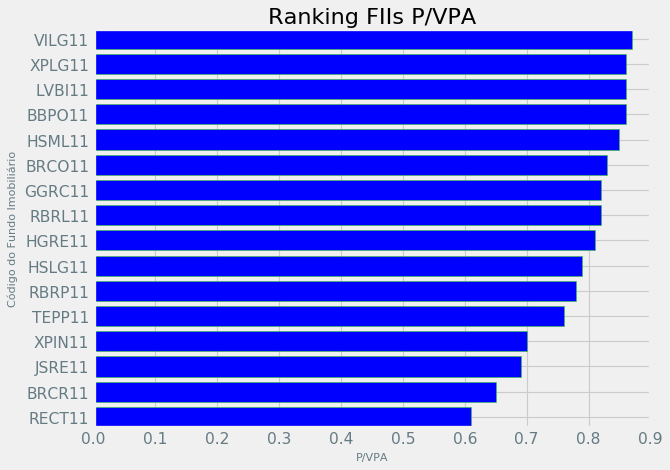

In [ ]:
# FIIs mais baratos de acordo com P/VPA
plt.barh(x1, y1, color='blue', edgecolor= 'limegreen', linewidth = .5)
plt.ylabel('Código do Fundo Imobiliário', fontsize=10)
plt.xlabel('P/VPA', fontsize=10)
plt.title("Ranking FIIs P/VPA") 
plt.rcParams.update({'font.size':8})
plt.show()

### 5.2 Ranking FIIs maiores pagadores de dividendos.

In [ ]:
# Definindo eixo x2
x2 = Carteira_16_ativos_maior_pagadora_dy['Códigodo fundo']

In [ ]:
# Definindo eixo y2
y2 = Carteira_16_ativos_maior_pagadora_dy['DY (12M)Acumulado']

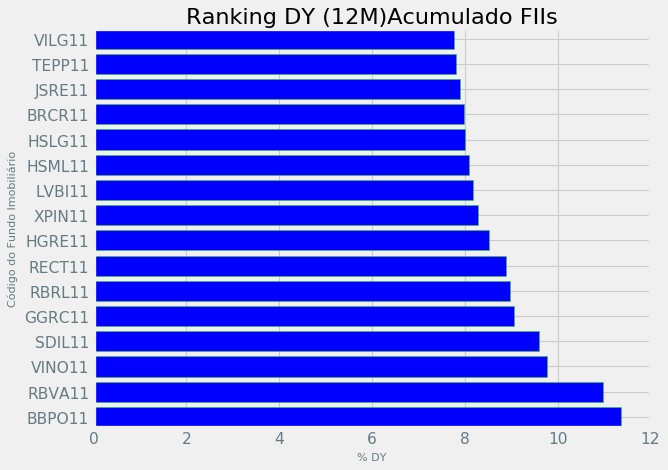

In [ ]:
# FIIs maiores pagadores de dividendos.
plt.barh(x2, y2, color='blue', edgecolor= 'limegreen', linewidth = .5)
plt.ylabel('Código do Fundo Imobiliário', fontsize=10)
plt.xlabel('% DY', fontsize=10)
plt.title("Ranking DY (12M)Acumulado FIIs") 
plt.rcParams.update({'font.size':8})
plt.style.use('fivethirtyeight')
plt.show()

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
